In [10]:
import torch
model = torch.load("meter-reading-model-best.pt")

In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torchvision import transforms
from ultralytics import YOLO

transform = transforms.Compose([
    transforms.ToTensor()
])

model = YOLO("meter-reading-model-best.pt") # Load the best model

AttributeError: partially initialized module 'torchvision' has no attribute 'extension' (most likely due to a circular import)

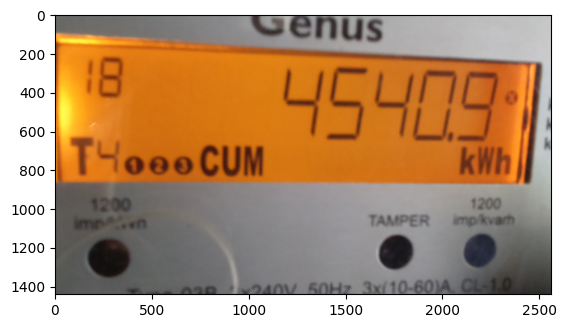

In [49]:
image = plt.imread("d.JPG")

img_tensor = transform(image)
plt.imshow(img_tensor.permute(1, 2, 0))
plt.show()


In [50]:
result = model.predict(img_tensor.unsqueeze(0)) # Predict the image


0: 1440x2560 2 2s, 1 3, 3 4s, 1 7, 2117.4ms
Speed: 0.5ms preprocess, 2117.4ms inference, 48.6ms postprocess per image at shape (1, 3, 1440, 2560)


In [51]:
classes = result[0].boxes.cls
classes

tensor([2., 4., 4., 2., 4., 3., 7.])

In [52]:
s_result = 0
classes = result[0].boxes.cls
xy = [int(i[0]) for i in result[0].boxes.xyxy]
a = sorted(range(len(xy)), key=lambda k: xy[k])
for idx, i in enumerate(reversed(a)):
  power = 10**idx 
  s_result += int(classes[i])*power
  # print(s_result)
s_result = s_result/10
s_result

424472.3

In [64]:
result[0].boxes.cls

tensor([2., 2., 2., 7., 0.])

In [62]:
result[0].boxes.conf

tensor([0.8205, 0.8158, 0.8108, 0.7760, 0.7427])


0: 1440x2560 1 0, 1 1, 2 3s, 1 4, 1 9, 1547.0ms
Speed: 0.0ms preprocess, 1547.0ms inference, 19.5ms postprocess per image at shape (1, 3, 1440, 2560)


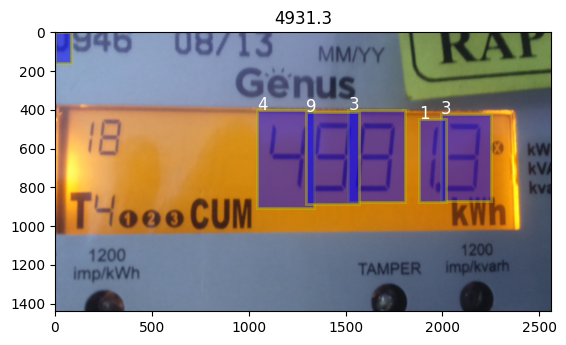

In [69]:
import matplotlib.patches as patches

image = plt.imread("d.JPG")

img_tensor = transform(image)

result = model.predict(img_tensor.unsqueeze(0)) # Predict the image

## classes to actaul number convertion
s_result = 0
classes = result[0].boxes.cls
xy = [int(i[0]) for i in result[0].boxes.xyxy]
a = sorted(range(len(xy)), key=lambda k: xy[k])
for idx, i in enumerate(reversed(a)):
  power = 10**idx 
  s_result += int(classes[i])*power
  # print(s_result)
s_result = s_result/10 # final result

# Visualize the result
data = result[0].orig_img
fig, ax = plt.subplots()
ax.imshow(data)

for idx, box in enumerate(result[0].boxes.xywh):
  x_center, y_center, width, height = box.cpu()
  xmin = x_center - width / 2
  ymin = y_center - height / 2
  xmax = x_center + width / 2
  ymax = y_center + height / 2
  rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor="y", facecolor="b", alpha=0.5)
  ax.add_patch(rect)
  plt.text(xmin, ymin, f"{int(classes[idx])}", fontsize=12, color="white")
plt.title(s_result)
plt.show()